In [1]:
pip install dataenforce

  Using cached dataenforce-0.1.2-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from functions.data_handler import DataHandler

In [7]:
import math
import os
import zipfile
from urllib.request import urlretrieve
from dataenforce import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
output_file = "data.zip"
csv_file = "hour.csv"

In [9]:
zip_contents = zipfile.ZipFile(f"./downloads/{output_file}")
df = pd.read_csv(zip_contents.open(csv_file))
df.dteday = pd.to_datetime(df.dteday)
df = df.set_index("dteday")
df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [32]:
df.index +=  pd.to_timedelta(df.hr, unit='h')
print(df)

                     instant  season  yr  mnth  hr  holiday  weekday  \
2011-01-01 00:00:00        1       1   0     1   0        0        6   
2011-01-01 02:00:00        2       1   0     1   1        0        6   
2011-01-01 04:00:00        3       1   0     1   2        0        6   
2011-01-01 06:00:00        4       1   0     1   3        0        6   
2011-01-01 08:00:00        5       1   0     1   4        0        6   
...                      ...     ...  ..   ...  ..      ...      ...   
2013-01-01 14:00:00    17375       1   1    12  19        0        1   
2013-01-01 16:00:00    17376       1   1    12  20        0        1   
2013-01-01 18:00:00    17377       1   1    12  21        0        1   
2013-01-01 20:00:00    17378       1   1    12  22        0        1   
2013-01-01 22:00:00    17379       1   1    12  23        0        1   

                     workingday  weathersit  temp   atemp   hum  windspeed  \
2011-01-01 00:00:00           0           1  0.24  0.2879

In [73]:
import datetime

In [90]:
def forecast(month: int):
    df_month = df.loc[df.index.month == month]
    df_month = df_month.groupby(["weekday","hr"]).cnt.agg(["mean", "std"])
    df_month.index = df_month.index.get_level_values(1)
    df_month = df_month.reset_index()
    fig, ax = plt.subplots(figsize=(15,9))

    datetime_object = datetime.datetime.strptime(str(month), "%m")
    full_month_name = datetime_object.strftime("%B")

    ax.fill_between(df_month.index,
                    df_month['mean']-df_month['std'],
                    df_month['mean']+df_month['std'],
                    alpha=0.4)

    df_month['mean'].plot(ax=ax, c='C3')

    ax.set_ylabel("# of bike rentals")
    ax.set_xlabel("hour")

    plt.title(f"Expected weekly rentals in {full_month_name}")
    plt.show()

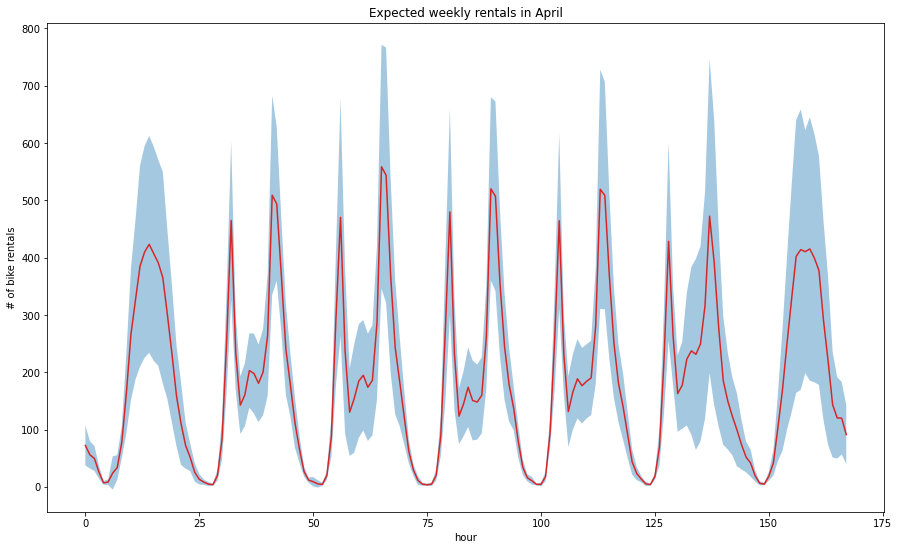

In [99]:
forecast(4)

In [38]:
april = df.loc[df.index.month == 4]
april

test =april.groupby(["weekday","hr"]).cnt.agg(["mean", "std"])

In [39]:
test

mean         std
weekday hr                        
0       0    72.222222   34.938438
        1    55.888889   23.871764
        2    49.333333   21.765799
        3    25.333333   11.090537
        4     6.888889    3.218868
...                ...         ...
6       19  220.111111  146.644506
        20  143.555556   92.325662
        21  120.444444   71.132115
        22  119.777778   63.249067
        23   91.222222   51.243970

[168 rows x 2 columns]

In [51]:
test.index = test.index.get_level_values(1)

In [61]:
test = test.reset_index()


<AxesSubplot:>

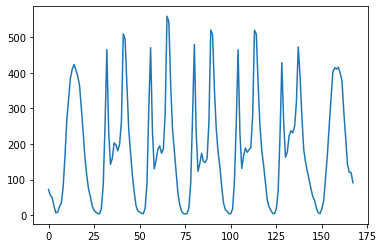

In [63]:
test["mean"].plot()

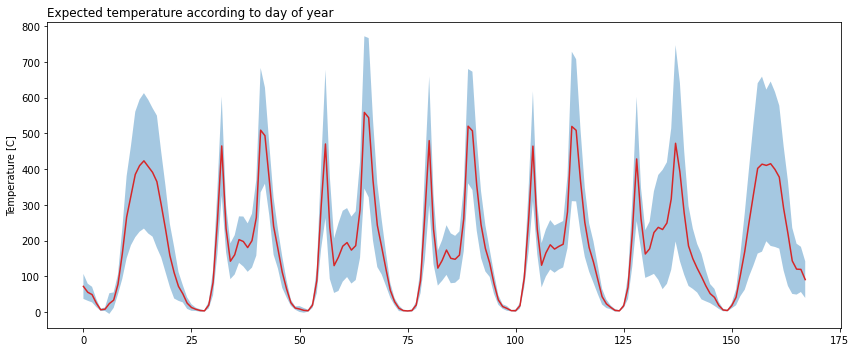

In [64]:
fig, ax = plt.subplots(figsize=(12,5))

ax.fill_between(test.index,
                test['mean']-test['std'],
                test['mean']+test['std'],
                alpha=0.4)

test['mean'].plot(ax=ax, c='C3')

ax.set_ylabel("Temperature [C]")

plt.title("Expected temperature according to day of year", loc='left')
plt.tight_layout()
plt.show()